In [73]:
import pandas as pd
import datetime

In [78]:
# Reading in data

crimes = pd.read_csv('Crimes.csv')
full_moon = pd.read_csv('full_moon.csv')
holidays = pd.read_csv('holidays.csv')
weather = pd.read_csv('weather.csv')
unemploy = pd.read_csv('CHIC917URN.csv')

### Merge Datasets
Here each date column is turned into a simple date time of the form Year/Month/Day to more easily join them together.

In [79]:
# Aligning date columns to allow for joining

weather['date'] = pd.to_datetime(weather['datetime'])
weather.drop(columns=['datetime'], inplace = True)

crimes['Date'] = pd.to_datetime(crimes.Date)
crimes['date'] = pd.to_datetime(pd.to_datetime(crimes['Date']).dt.date)
crimes['time'] = pd.to_datetime(crimes['Date']).dt.time
crimes['day_of_week'] = pd.to_datetime(crimes['date']).dt.day_of_week
crimes.drop(columns=['Date'], inplace=True)

full_moon['date'] = pd.to_datetime(full_moon.FullMoonDates)
full_moon.drop(columns=['FullMoonDates', 'Year'], inplace=True)
full_moon['full_moon'] = (pd.DataFrame({'full_moon': pd.Series(['full moon'] * len(full_moon))}))

holidays['date'] = pd.to_datetime(holidays.Date)
holidays.drop(columns = ['Date'], inplace=True)

unemploy['date'] = pd.to_datetime(unemploy['DATE'])
unemploy.drop(columns=['DATE'], inplace = True)

In [80]:
# Merging dataframes

merged = pd.merge(crimes, weather, on='date', how='left')
merged = pd.merge(merged, full_moon, on='date', how = 'left')
merged = pd.merge(merged, holidays, on='date', how = 'left')
merged = pd.merge(merged, unemploy, on='date', how = 'left')

### Possible Factors

Below is a list of all of the possible factors from the datasets.

One thing we will want to consider - the prompt asks for us to limit our analysis to instances of violent crime, which some of the rows aren't. We could use the IUCR Illinois crime codes, the FBI codes or the descriptions to find a way to limit the rows.

In [7]:
df = merged[['date',
 'time',
 'day_of_week',
 # 'ID', 'Case Number',
 # 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 # 'Arrest',
 # 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 # 'X Coordinate',
 # 'Y Coordinate',
 # 'Year',
 # 'Updated On',
 # 'Latitude',
 # 'Longitude',
 'Location',
 # 'name',
 'tempmax',
 'tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'humidity',
 'precip',
 'precipprob',
 'precipcover',
 'preciptype',
 'snow',
 'snowdepth',
 'windgust',
 'windspeed',
 # 'winddir',
 # 'sealevelpressure',
 'cloudcover',
 'visibility',
 # 'solarradiation',
 # 'solarenergy',
 # 'uvindex',
 # 'severerisk',
 'sunrise',
 'sunset',
 'moonphase',
 'conditions',
 # 'description',
 # 'icon',
 # 'stations',
 'full_moon',
 'Holiday',
 # 'Day of Week'
 ]]

### Merge on Crimes per Day

In [81]:
crime_count = pd.DataFrame(crimes['date'].value_counts().reset_index())

In [83]:
merged2 = pd.merge(crime_count, weather, on='date', how='left')
merged2 = pd.merge(merged2, full_moon, on='date', how = 'left')
merged2 = pd.merge(merged2, holidays, on='date', how = 'left')
merged2 = pd.merge(merged2, unemploy, on='date', how = 'left')

merged2 = merged2[merged2['date'].dt.year > 2009]
merged2 = merged2.sort_values(by = 'date')

merged2['CHIC917URN'] = merged2['CHIC917URN'].fillna(method='ffill')

merged2['day_of_week'] = pd.to_datetime(merged2['date']).dt.day_of_week
merged2['year'] = pd.to_datetime(merged2['date']).dt.year
merged2['month'] = pd.to_datetime(merged2['date']).dt.month

In [12]:
df['Location Description'].value_counts()

Location Description
STREET                                             147309
SIDEWALK                                            95368
RESIDENCE                                           61446
APARTMENT                                           58919
ALLEY                                               17665
                                                    ...  
TRUCK                                                   1
ROOMING HOUSE                                           1
STAIRWELL                                               1
LIQUOR STORE                                            1
VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS         1
Name: count, Length: 157, dtype: int64

In [15]:
df['day_of_week'].value_counts()

day_of_week
4    76257
2    75971
3    75254
1    75106
5    72866
0    69990
6    66743
Name: count, dtype: int64

### Violent Crimes

26 - Tresspassing, registration offense, harassment, order violation\
07 - Motor vehicle theft\
17 - Sexual Offense\
18 - Drug Violations\
11 - Fraud/Identity theft/Deception\
08B - Battery - Simple\
04B - Battery - Aggravated\
08A - Assault - Simple\
24 - Violation of Peace/Interfering with Officer\
14 - Criminal Damage\
06 - Theft\
05 - Burglary\
15 - Weapons Violation\
13 - Deceptive Practice (Buying or receiving stolen property)\
20 - Offense Involving Children (Abandonment or Endangering)\
10 - Forgery and Counterfeit\
09 - Arson\
22 - Liquor law violation\
16 - Prostitution\
19 - Gambling\
12 - Embezzlement\
27 - Sex Offense\
01B - Homicide


#### Violent Crimes
01A - First Degree Murder\
03 - Robbery\
04A - Assault - Aggravated\
02 - Criminal Sexual Assault

## Random Forest

In [39]:
X = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
             'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
             'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
             'moonphase', 'day_of_week', 'year', 'month', 'preciptype', 'sunrise', 'sunset', 'conditions', 'full_moon', 
             'Holiday', 'CHIC917URN']]

num_features = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN']]

cat_features = merged2[['preciptype', 'conditions', 'full_moon', 'Holiday']]

cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

y = list(merged2['count'])

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.feature_selection import SelectPercentile, f_regression

In [16]:

numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())])

categorical = Pipeline(steps=[('impute2', SimpleImputer(strategy='most_frequent')),
                     ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
                     ('percent', SelectPercentile(f_regression, percentile=60))
                     ])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric, num_features),
        ("categorical", categorical, cat_features)
        ]
)
rfPipe = Pipeline([('preprocessor', preprocessor),
           ('model', RandomForestRegressor())])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rfPipe = rfPipe.fit(X_train, y_train)

y_pred = rfPipe.predict(X_test)  
mae = mean_absolute_error(y_test, y_pred) 
mae

In [144]:
rf_model = categorical.named_steps['model']

feature_importances = rf_model.feature_importances_

original_cat_feature_names = cat_features.columns

# Create a DataFrame to store feature importances with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': original_cat_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

ValueError: All arrays must be of the same length

In [46]:
num_features = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN']]

numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2)),
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor())])

X_train, X_test, y_train, y_test = train_test_split(num_features, y, test_size=0.25, random_state=42)

numeric = numeric.fit(X_train, y_train)

y_pred = numeric.predict(X_test)  
mean_absolute_error(y_test, y_pred) 

7.30890092879257

In [42]:
rf_model = numeric.named_steps['model']

feature_importances = rf_model.feature_importances_

original_numeric_feature_names = num_features.columns

feature_importance_df = pd.DataFrame({'Feature': original_numeric_feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

             Feature  Importance
24              year    0.368752
26        CHIC917URN    0.084021
23       day_of_week    0.035284
3       feelslikemax    0.034533
14           winddir    0.032910
1            tempmin    0.032343
22         moonphase    0.031695
5          feelslike    0.030455
4       feelslikemin    0.029992
13         windspeed    0.029750
15  sealevelpressure    0.029467
16        cloudcover    0.029159
0            tempmax    0.027985
12          windgust    0.027858
6           humidity    0.027224
18    solarradiation    0.024667
2               temp    0.024052
19       solarenergy    0.021375
7             precip    0.019040
25             month    0.016028
17        visibility    0.013436
9        precipcover    0.009903
20           uvindex    0.008484
11         snowdepth    0.008238
10              snow    0.002238
8         precipprob    0.000904
21        severerisk    0.000206


In [50]:
betas = numeric.named_steps['model'].feature_importances_

features = numeric.named_steps['poly'].get_feature_names_out()

original_feature_names = numeric.named_steps['impute'].get_feature_names_out()
poly_feature_names = numeric.named_steps['poly'].get_feature_names_out(input_features=original_feature_names)

dict = {'Feature': poly_feature_names, 'Coefficient': betas}
coefficients = pd.DataFrame(dict)

coefficients.sort_values(by='Coefficient', ascending = False).head(10)

,Feature,Coefficient
400,year^2,0.128177
388,severerisk year,0.125851
25,year,0.100130
360,visibility CHIC917URN,0.029293
54,tempmax CHIC917URN,0.026079
339,sealevelpressure CHIC917URN,0.015214
79,tempmin month,0.012080
336,sealevelpressure day_of_week,0.011184
151,feelslikemin month,0.010790
146,feelslikemin uvindex,0.009601


In [52]:
import matplotlib.pyplot as plt

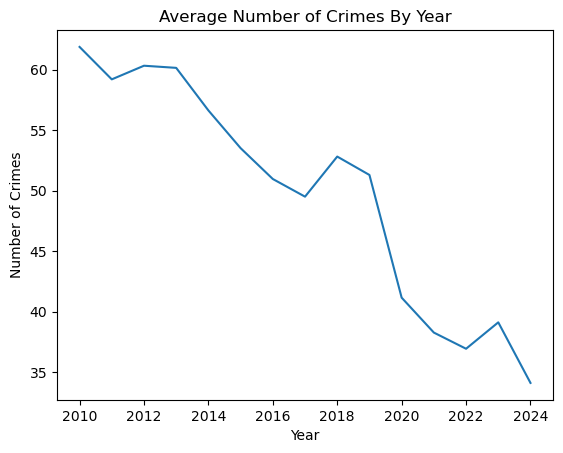

In [55]:
plt.plot(merged2.groupby(merged2['year'])['count'].mean()) 
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title(f'Average Number of Crimes By Year')

plt.show()

## Random Forest on Violent Crimes

In [141]:

crimes2 = crimes[(crimes['FBI Code'] == '01A') | 
                 (crimes['FBI Code'] == '02') | 
                 (crimes['FBI Code'] == '03') | 
                 (crimes['FBI Code'] == '04A')]
crime_count2 = pd.DataFrame(crimes2['date'].value_counts().reset_index())

In [168]:
merged3 = pd.merge(crime_count2, weather, on='date', how='outer')
merged3 = pd.merge(merged3, full_moon, on='date', how = 'left')
merged3 = pd.merge(merged3, holidays, on='date', how = 'left')
merged3 = pd.merge(merged3, unemploy, on='date', how = 'left')

merged3 = merged3[merged3['date'].dt.year > 2009]
merged3 = merged3.sort_values(by = 'date')

merged3['CHIC917URN'] = merged3['CHIC917URN'].fillna(method='ffill')

merged3['day_of_week'] = pd.to_datetime(merged3['date']).dt.day_of_week
merged3['year'] = pd.to_datetime(merged3['date']).dt.year
merged3['month'] = pd.to_datetime(merged3['date']).dt.month

merged3['count'] = merged3['count'].fillna(0)

In [153]:
num_features = merged3[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN']]

y = list(merged3['count'])

numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor())])

X_train, X_test, y_train, y_test = train_test_split(num_features, y, test_size=0.25, random_state=42)

numeric = numeric.fit(X_train, y_train)

y_pred = numeric.predict(X_test)  
mean_absolute_error(y_test, y_pred) 

1.7086476043276664

In [154]:
rf_model = numeric.named_steps['model']

feature_importances = rf_model.feature_importances_

original_numeric_feature_names = num_features.columns

feature_importance_df = pd.DataFrame({'Feature': original_numeric_feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

             Feature  Importance
15  sealevelpressure    0.070090
13         windspeed    0.068993
14           winddir    0.068234
16        cloudcover    0.065375
22         moonphase    0.064872
6           humidity    0.063070
12          windgust    0.056459
26        CHIC917URN    0.046686
25             month    0.040454
4       feelslikemin    0.040320
18    solarradiation    0.039082
1            tempmin    0.038390
24              year    0.037305
3       feelslikemax    0.035768
0            tempmax    0.034992
17        visibility    0.032550
23       day_of_week    0.032151
5          feelslike    0.030451
19       solarenergy    0.030346
2               temp    0.028208
7             precip    0.025043
20           uvindex    0.016659
9        precipcover    0.013366
11         snowdepth    0.012608
10              snow    0.004977
8         precipprob    0.001806
21        severerisk    0.001747


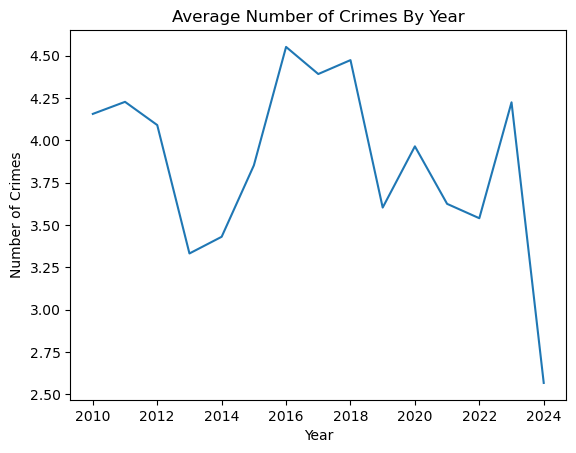

In [155]:
plt.plot(merged3.groupby(merged3['year'])['count'].mean()) 
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title(f'Average Number of Crimes By Year')

plt.show()

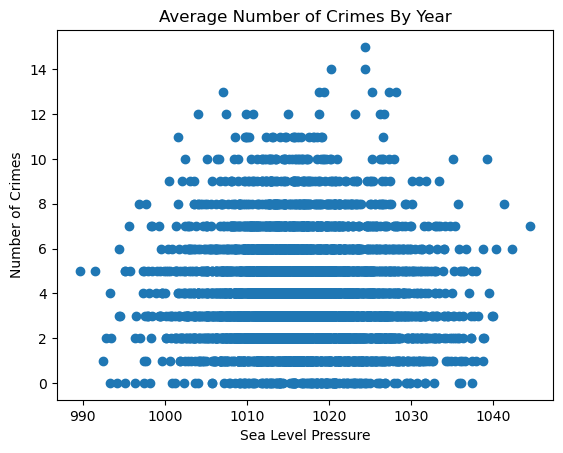

In [156]:
plt.scatter(merged3['sealevelpressure'], merged3['count']) 
plt.xlabel('Sea Level Pressure')
plt.ylabel('Number of Crimes')
plt.title(f'Average Number of Crimes By Year')

plt.show()

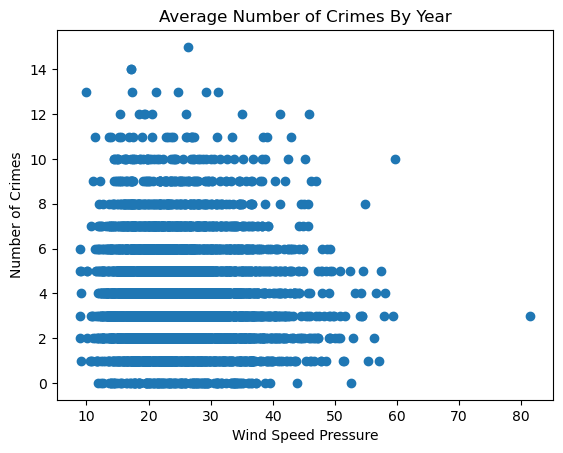

In [157]:
plt.scatter(merged3['windspeed'], merged3['count']) 
plt.xlabel('Wind Speed Pressure')
plt.ylabel('Number of Crimes')
plt.title(f'Average Number of Crimes By Year')

plt.show()

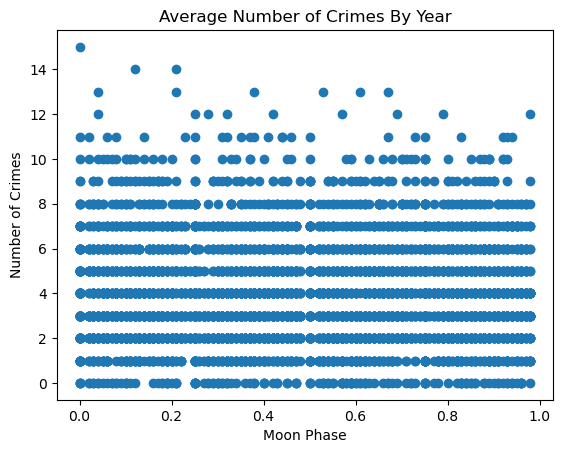

In [158]:
plt.scatter(merged3['moonphase'], merged3['count']) 
plt.xlabel('Moon Phase')
plt.ylabel('Number of Crimes')
plt.title(f'Average Number of Crimes By Year')

plt.show()

In [ ]:
cat_features = merged3[['preciptype', 'conditions', 'full_moon', 'Holiday']]

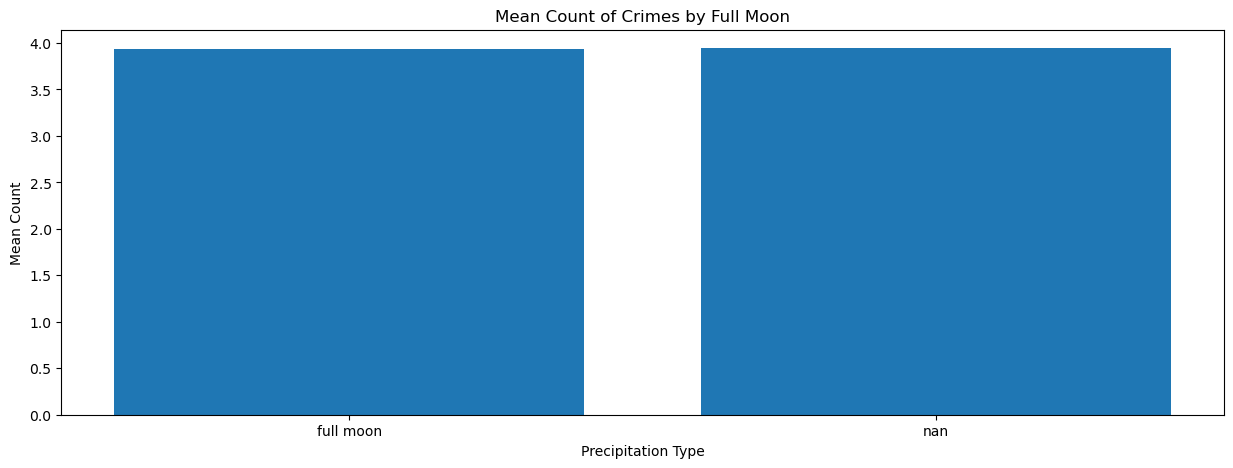

In [159]:
merged3['full_moon'] = merged3['full_moon'].astype(str)
means = merged3.groupby(merged3['full_moon'])['count'].mean()

# Plot the bar graph
plt.figure(figsize=(15, 5))
plt.bar(means.index, means.values)

# Labeling the axes and title
plt.xlabel('Precipitation Type')
plt.ylabel('Mean Count')
plt.title('Mean Count of Crimes by Full Moon')
plt.show()

In [160]:
merged3.groupby(merged3['full_moon'])['count'].mean()

full_moon
full moon    3.936416
nan          3.945800
Name: count, dtype: float64

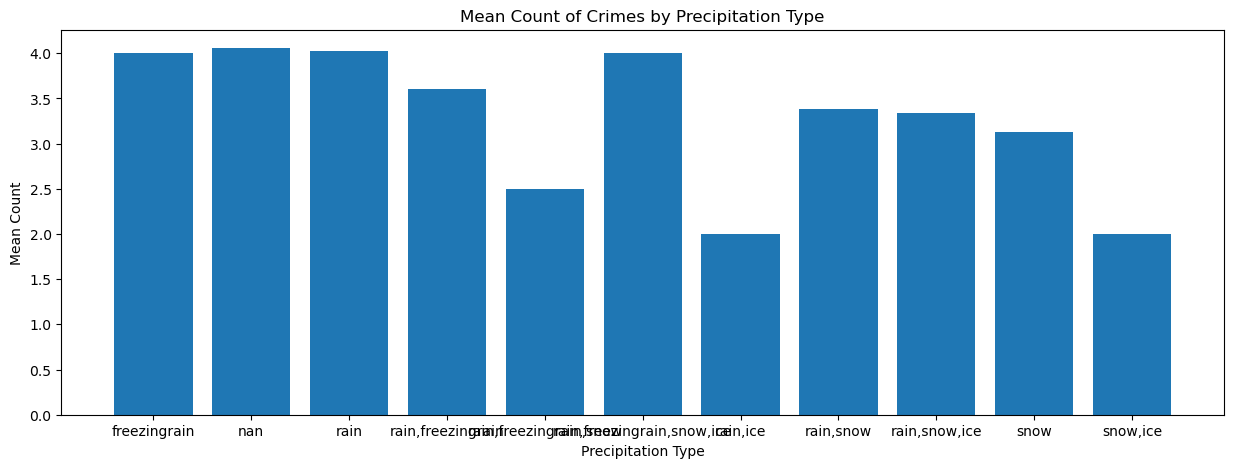

In [161]:
merged3['preciptype'] = merged3['preciptype'].astype(str)
means = merged3.groupby(merged3['preciptype'])['count'].mean()

# Plot the bar graph
plt.figure(figsize=(15, 5))
plt.bar(means.index, means.values)

# Labeling the axes and title
plt.xlabel('Precipitation Type')
plt.ylabel('Mean Count')
plt.title('Mean Count of Crimes by Precipitation Type')
plt.show()

In [162]:
merged3.groupby(merged3['preciptype'])['count'].mean()

preciptype
freezingrain                  4.000000
nan                           4.056987
rain                          4.021689
rain,freezingrain             3.600000
rain,freezingrain,snow        2.500000
rain,freezingrain,snow,ice    4.000000
rain,ice                      2.000000
rain,snow                     3.379653
rain,snow,ice                 3.333333
snow                          3.132530
snow,ice                      2.000000
Name: count, dtype: float64

In [163]:
merged3.groupby(merged3['Holiday'])['count'].mean()

Holiday
Christmas Day                 2.428571
Christmas Eve                 4.357143
Columbus Day                  4.857143
Halloween                     3.571429
Independence Day              3.857143
Labor Day                     2.928571
Martin Luther King Jr. Day    2.642857
Memorial Day                  3.285714
New Year's Day                8.785714
New Year's Eve                5.142857
Presidents' Day               3.214286
St. Patrick's Day             3.357143
Thanksgiving Day              3.285714
Valentine's Day               3.214286
Veterans Day                  3.785714
Name: count, dtype: float64

In [166]:
merged3.groupby(merged3['day_of_week'])['count'].mean()

day_of_week
0    3.817321
1    3.847091
2    3.870095
3    3.783491
4    4.002706
5    4.188092
6    4.109608
Name: count, dtype: float64

In [167]:
merged3.groupby(merged3['month'])['count'].mean()

month
1     3.498925
2     3.176887
3     3.255760
4     3.702381
5     3.940092
6     4.228571
7     4.380184
8     4.509217
9     4.178571
10    4.426267
11    4.069048
12    4.006912
Name: count, dtype: float64

In [164]:
merged3['count'].mean()

3.9454861782331334

In [165]:
merged3.groupby(merged3['conditions'])['count'].mean()

conditions
Clear                                                        3.883803
Overcast                                                     3.725191
Partially cloudy                                             4.064622
Rain                                                         3.800000
Rain, Freezing Drizzle/Freezing Rain, Partially cloudy       3.666667
Rain, Ice, Partially cloudy                                  2.000000
Rain, Overcast                                               3.903288
Rain, Partially cloudy                                       4.073322
Snow                                                         5.000000
Snow, Ice, Overcast                                          2.000000
Snow, Overcast                                               3.373134
Snow, Partially cloudy                                       3.000000
Snow, Rain, Freezing Drizzle/Freezing Rain, Ice, Overcast    4.000000
Snow, Rain, Freezing Drizzle/Freezing Rain, Overcast         2.500000
Snow, Rai

In [143]:
date_range = pd.date_range(start=merged3['date'].min(), end=merged3['date'].max())

# Identify missing dates by checking for differences between the date range and the dates in the DataFrame
missing_dates = date_range[~date_range.isin(merged3['date'])]

if len(missing_dates) > 0:
    print("Missing dates found:")
    print(missing_dates)
else:
    print("No missing dates found.")

No missing dates found.


# Final Random Forest

In [178]:
merged3['preciptype'] = merged3['preciptype'].astype(object)


In [185]:
merged3.dtypes

date                datetime64[ns]
count                      float64
name                        object
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                 float64
precipcover                float64
preciptype                  object
snow                       float64
snowdepth                  float64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                    float64
severerisk                 float64
sunrise                     object
sunset              

In [194]:
X[cat_features].dtypes

preciptype    object
conditions    object
Holiday       object
dtype: object

In [187]:
num_features

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'moonphase', 'day_of_week', 'year', 'month',
       'CHIC917URN', 'snowdepth', 'precipcover', 'uvindex'],
      dtype='object')

In [198]:
X = merged3[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
             'precip', 'windgust', 'windspeed', 'winddir', 
             'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 
             'moonphase', 'day_of_week', 'year', 'month', 'preciptype', 'conditions', 
             'Holiday', 'CHIC917URN', 'snowdepth', 'precipcover', 'uvindex']]

cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

y = list(merged3['count'])

numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2)),
    ('standardize', StandardScaler()),
    ('percent', SelectPercentile(f_regression, percentile=70))])

categorical = Pipeline(steps=[('impute2', SimpleImputer(strategy='most_frequent')),
                     ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
                     ])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric, num_features),
        ("categorical", categorical, cat_features)
        ]
)
rfPipe = Pipeline([('preprocessor', preprocessor),
           ('model', RandomForestRegressor())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rfPipe = rfPipe.fit(X_train, y_train)

y_pred = rfPipe.predict(X_test)  
mae = mean_absolute_error(y_test, y_pred) 
mae

1.716421947449768

In [202]:
merged3.to_csv('merged3.csv')